# Classification Modelling And Regression Analysis Project

### This project is aimed at data analysis and processing of natural language usiong the aid of the nltk package thus reaging the texts from a book and then using it for nanalysis and observation of similarity

### The texts from the four books are taken from the ite -project gutenberg and then the analysis and compare the similarity . Also some movie reviews taken from the corpus are taken and the analyzed

In [52]:
!pip install --quiet nltk

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import nltk
nltk.download("all",quiet=True)



True

### Importing the book "The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson" from Project gutenberg and vizualizing the distribution of the words

In [3]:
url="https://www.gutenberg.org/files/43/43-h/43-h.htm"
req=requests.get(url)
type(req)

requests.models.Response

In [4]:
html=req.text
print(html)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson</title>
<link rel="coverpage" href="images/cover.jpg" />
<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font

In [5]:
soup=BeautifulSoup(html,"html5lib")
soup.title.string

'The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson'

In [6]:
soup.findAll('a')
text=soup.get_text()
#print (text)

 ### Nltk to examine text

In [9]:
tokenizer=nltk.tokenize.RegexpTokenizer("\w+")
tokens=tokenizer.tokenize(text)

print (len(tokens))
tokens[:9]

29359


['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Strange', 'Case', 'Of']

In [10]:
words=[]

#make lower case
for word in tokens:
    words.append(word.lower())

words[:9]

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'strange', 'case', 'of']

#### stop words are the gramatical words that we often exclude from the text while doing the natural language precessing as the frequency of these words dosent necessarily fetch and particular conclusion about the text processing

In [11]:
sw= nltk.corpus.stopwords.words("english")
type(sw)
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
words2=[]

#all words except stopwords
for word in words:
    if word not in sw:
        words2.append(word)
words2[:7]

['project', 'gutenberg', 'ebook', 'strange', 'case', 'dr', 'jekyll']

### The  plot shows the distribution of the most frequently occuring words within the text The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson

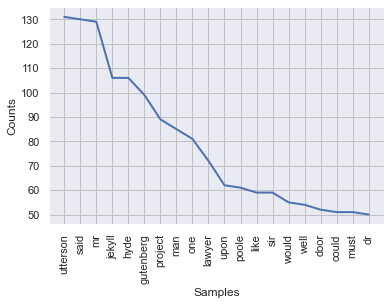

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
#vizualization

sns.set(color_codes=True)
FreqDist=nltk.FreqDist(words2)
FreqDist.plot(20)

### Making a function that can extract the text from any site and then process it to show the frequency distribution of the words withion the text

In [15]:
def plot_words(url):
    req=requests.get(url)
    html=req.text
    soup=BeautifulSoup(html,"html5lib")
    text=soup.get_text()
    tokenizer=nltk.tokenize.RegexpTokenizer("\w+")
    tokens=tokenizer.tokenize(text)
    words=[]
    
    for word in tokens: 
        words.append(word.lower())
    
    sw= nltk.corpus.stopwords.words("english")
    
    for word in words:
        if word not in sw:
            words2.append(word)
    
    FreqDist=nltk.FreqDist(words2)
    FreqDist.plot(20)
            


### The plot shows the distribution of the most frequently occuring words within the text The Empty House and The Other Ghost Stories

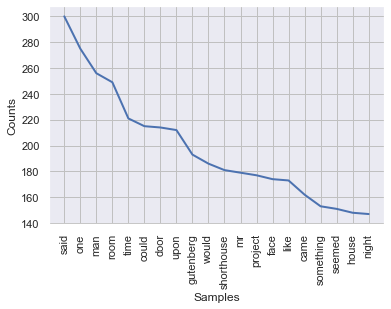

In [16]:
plot_words("https://www.gutenberg.org/files/14471/14471-h/14471-h.htm")

### The plot shows the distribution of the most frequently occuring words within the text Eleven Possible Cases

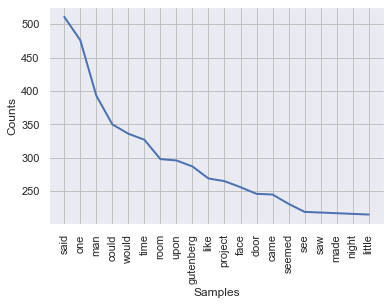

In [17]:
plot_words("https://www.gutenberg.org/files/32117/32117-h/32117-h.htm")

## Movie Reviws text analysis and frequency

In [20]:
documents=[(list(nltk.corpus.movie_reviews.words(fileid)),category)
          for category in nltk .corpus.movie_reviews.categories()
          for fileid in nltk.corpus.movie_reviews.fileids(category)]

import random

random.shuffle(documents)
#print(documents[0])

In [21]:
all_words=[]
for w in nltk .corpus.movie_reviews.words():
    all_words.append(w.lower())
    
# frequecy distribution

all_words=nltk.FreqDist(all_words)
all_words

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [22]:
print(all_words.most_common(10))
#thus we need to remove the stockword

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [23]:
print(all_words["good"])

2411


### Finding Features of textual data

In [24]:
word_feats=list(all_words.keys())[:2500]


In [27]:
def find_feats(document):
    words=set(document)
    feats={}
    for w in word_feats:
        feats[w]=(w in words)
    
    return feats

In [29]:
#build set of features

feat_set=[(find_feats(rev),category) for (rev,category) in documents]

len(feat_set)

2000

## Naive Bayes with Nltk

In [30]:
trainer=feat_set[:1700]

tester=feat_set[1700:]

### testing the accuracy of the classifier with the movie reviews textual dataset and getting an efficiency of 83%

In [32]:
import nltk
classifier=nltk.NaiveBayesClassifier.train(trainer)

print("accuracy of classifier %:",(nltk.classify.accuracy(classifier,tester))*100)

accuracy of classifier %: 83.33333333333334


### we get a distribution of the most frequent words that are occuring in the movie reviews and then it predicts whether the review is a posetive review or a negative review in a ratio wise manner 

In [55]:
# most valuable words for reviews

classifier.show_most_informative_features(10)

Most Informative Features
               atrocious = True              neg : pos    =     10.0 : 1.0
                  annual = True              pos : neg    =      9.4 : 1.0
                 frances = True              pos : neg    =      8.7 : 1.0
              schumacher = True              neg : pos    =      7.6 : 1.0
                 kidding = True              neg : pos    =      6.5 : 1.0
                  turkey = True              neg : pos    =      6.3 : 1.0
                 cunning = True              pos : neg    =      6.1 : 1.0
                   chick = True              neg : pos    =      6.0 : 1.0
                  regard = True              pos : neg    =      6.0 : 1.0
                 bronson = True              neg : pos    =      5.8 : 1.0


## Cosine similarity between texts

### importing the following four texts from the project gutenberg site

#### 1.Toisten ihmisten lapset by John Habberton
#### 2. The Illustrators of Montmartre, by Frank L. Emanuel
#### 3.Marcel Proust, by C. K. Scott Moncrieff
#### 4.No Time For Toffee!, by Charles F. Myers

In [35]:
#get 4 data texts

#Toisten ihmisten lapset by John Habberton
url1="https://www.gutenberg.org/cache/epub/65928/pg65928.html"

#The Illustrators of Montmartre, by Frank L. Emanuel
url2="https://www.gutenberg.org/files/65929/65929-h/65929-h.htm"

# Marcel Proust, by C. K. Scott Moncrieff
url3="https://www.gutenberg.org/files/65930/65930-h/65930-h.htm"

#No Time For Toffee!, by Charles F. Myers
url4="https://www.gutenberg.org/files/65931/65931-h/65931-h.htm"

### Building the customized function for tokenizer 

In [36]:
#building customized defination 

import string 
lemmer=nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict= dict((ord(punct),None)for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
    

### Function for the cleaning of the word list of the four texts 

In [37]:
def clean_word_list(url) :
    req=requests.get(url)
    html=req.text
    soup=BeautifulSoup(html,"html5lib")
    text=soup.get_text()
    tokenizer=LemNormalize
    tokens=tokenizer(text)
    words=[]
    for word in tokens: 
        words.append(word)
    return words

In [38]:
#Toisten ihmisten lapset by John Habberton
clean1=clean_word_list(url1)

#The Illustrators of Montmartre, by Frank L. Emanuel
clean2=clean_word_list(url2)

# Marcel Proust, by C. K. Scott Moncrieff
clean3=clean_word_list(url3)

#No Time For Toffee!, by Charles F. Myers
clean4=clean_word_list(url4)

In [39]:
clean1[:10]

['classless',
 'cs',
 'copied',
 'from',
 'httpswwwpgdpnetwikicsscookbookstyles',
 'set',
 'the',
 'body',
 'margin',
 'to']

### Converting the list of words to string

In [40]:
def list_to_string(orig_list,separator=' '):
    return separator.join(orig_list)


In [41]:
#Toisten ihmisten lapset by John Habberton
string1=list_to_string(clean1)

#The Illustrators of Montmartre, by Frank L. Emanuel
string2=list_to_string(clean2)

# Marcel Proust, by C. K. Scott Moncrieff
string3=list_to_string(clean3)

#No Time For Toffee!, by Charles F. Myers
string4=list_to_string(clean4)


In [43]:
print(type(string1))
string1[:10]

<class 'str'>


'classless '

In [44]:
# doc lib or list of strings
doc_lib=[string1,string2,string3,string4]

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvec=TfidfVectorizer(tokenizer=LemNormalize,stop_words="english")



In [45]:
def cos_similarity(textlist):
    tfidf=Tfidfvec.fit_transform(textlist)
    return (tfidf*tfidf.T).toarray()

In [47]:
#store in a library package

stored=cos_similarity(doc_lib)

stored

array([[1.        , 0.01390235, 0.01207007, 0.00402218],
       [0.01390235, 1.        , 0.45543665, 0.17113293],
       [0.01207007, 0.45543665, 1.        , 0.2310232 ],
       [0.00402218, 0.17113293, 0.2310232 , 1.        ]])

In [57]:
#naming and presenting dataframe
#Toisten ihmisten lapset by John Habberton
#The Illustrators of Montmartre, by Frank L. Emanuel
# Marcel Proust, by C. K. Scott Moncrieff
#No Time For Toffee!, by Charles F. Myers

names=["Toisten","Montmartre","Proust","Toffee"]


### Showing the cosine similarity matrix of the similarity of the four text that are being precessed

### the closer the value is to 1 more is the similarity in the words distribution and frequency within the texts

In [58]:
visual=pd.DataFrame(stored,index=names,columns=names)
print("cosine similarity matrix")
visual

cosine similarity matrix


,Toisten,Montmartre,Proust,Toffee
Toisten,1.000000,0.013902,0.012070,0.004022
Montmartre,0.013902,1.000000,0.455437,0.171133
Proust,0.012070,0.455437,1.000000,0.231023
Toffee,0.004022,0.171133,0.231023,1.000000
